In [4]:
import keras,os 
from keras.datasets import fashion_mnist, cifar100 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization 
from keras.models import Sequential 
from keras.utils import to_categorical 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import cv2 
from keras import optimizers 
from tensorflow.keras.layers import Lambda

from keras import backend as K 


In [5]:
from keras import regularizers 
from sklearn import datasets # load dataset 
from sklearn.model_selection import train_test_split # split dataset 
from sklearn.preprocessing import StandardScaler # standard scaler 
from sklearn.metrics import accuracy_score # check accuracy

In [7]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load CSV dataset
file_path = r"C:\Users\User\Downloads\vectorized_text_celeba_5000.csv"
data = pd.read_csv(file_path)

# Assuming the last column is the label
X = data.iloc[:, :-1].values  # Features
Y = data.iloc[:, -1].values   # Labels

# Normalize data (if needed)
X = X.astype('float32') / 255.0  

# Convert labels to categorical (one-hot encoding)
Y_one_hot = to_categorical(Y)

# Split dataset
train_X, test_X, train_Y, test_Y = train_test_split(X, Y_one_hot, test_size=0.2, random_state=42)

# Further split train data into a small training set and validation set
train_X1, val_X, train_Y1, val_Y = train_test_split(train_X, train_Y, test_size=0.1, random_state=42)

print("Train Shape:", train_X1.shape, train_Y1.shape)
print("Validation Shape:", val_X.shape, val_Y.shape)
print("Test Shape:", test_X.shape, test_Y.shape)


Train Shape: (3600, 74) (3600, 1)
Validation Shape: (400, 74) (400, 1)
Test Shape: (1000, 74) (1000, 1)


In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load original dataset (to generate labels)
df_original = pd.read_csv(r"C:\Users\User\Downloads\reduced_text_celeba_5000.csv")

# Generate labels based on text descriptions
df_original["label"] = df_original["text_description"].apply(
    lambda x: 1 if any(word in x.lower() for word in ["scar", "bruise", "wrinkle"]) else 0
)

# Load vectorized dataset (TF-IDF transformed)
df_vectorized = pd.read_csv(r"C:\Users\User\Downloads\vectorized_text_celeba_5000.csv")

# Extract features and generated labels
X = df_vectorized.values  # TF-IDF feature vectors
y = to_categorical(df_original["label"].values, num_classes=2)  # One-hot encoding labels (0 or 1)

# Train-test split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training set into train & validation sets
train_X1, val_X, train_Y1, val_Y = train_X[:100], train_X[100:150], train_Y[:100], train_Y[100:150]

# Define MLP model for vectorized text data
model = Sequential()
model.add(Dense(128, input_shape=(df_vectorized.shape[1],)))  # Input shape = number of TF-IDF features
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(2))  # Output layer for 2 classes
model.add(Activation('softmax'))  # Softmax for classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
model.fit(train_X1, train_Y1, validation_data=(val_X, val_Y), epochs=10, batch_size=8)


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,114 (70.76 KB)

 Trainable params: 18,114 (70.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8341 - loss: 0.6151 - val_accuracy: 1.0000 - val_loss: 0.3503
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.2728 - val_accuracy: 1.0000 - val_loss: 0.0879
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0632 - val_accuracy: 1.0000 - val_loss: 0.0136
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 9.1672e-04 - val_accuracy: 1.0000

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 1.0000 - loss: 4.8051e-04 - val_accuracy: 1.0000 - val_loss: 6.0593e-04
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 1.0000 - loss: 4.5695e-04 - val_accuracy: 1.0000 - val_loss: 5.9140e-04
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 4.5903e-04 - val_accuracy: 1.0000 - val_loss: 5.7731e-04
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 1.0000 - loss: 4.4418e-04 - val_accuracy: 1.0000 - val_loss: 5.6369e-04
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 1.0000 - loss: 4.3123e-04 - val_accuracy: 1.0000 - val_loss: 5.5056e-04
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 4.1362e-04 - val_accuracy: 1.0000 - val_loss: 5.3785e-04
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 1.0000 - loss: 3.9797e-04 - val_accuracy: 1.0000 - val_loss: 5.2551e-04
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 1

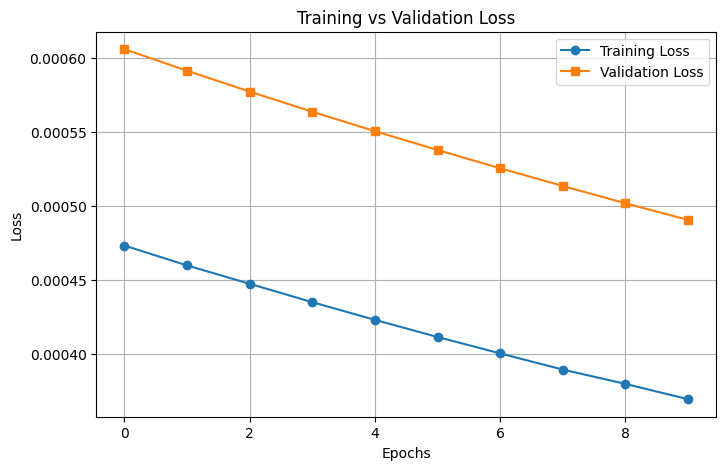

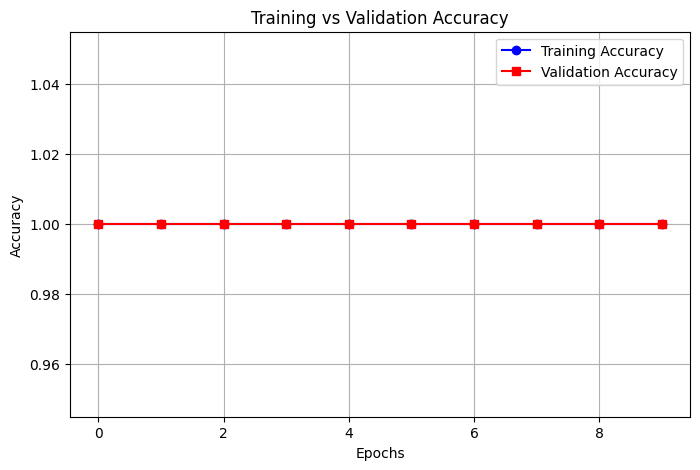

In [14]:
import matplotlib.pyplot as plt

# Train the model and store training history
history = model.fit(train_X1, train_Y1, batch_size=64, epochs=10, validation_data=(val_X, val_Y))

# Plot Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Training vs Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


In [17]:
# Evaluate the model on the test data (first 100 samples)
score = model.evaluate(test_X[:100], test_Y[:100], verbose=1)

# Print evaluation results
print("\nModel Evaluation Results:")
print(f"Loss: {score[0]:.4f}")
print(f"Accuracy: {score[1] * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 5.4474e-04

Model Evaluation Results:
Loss: 0.0006
Accuracy: 100.00%


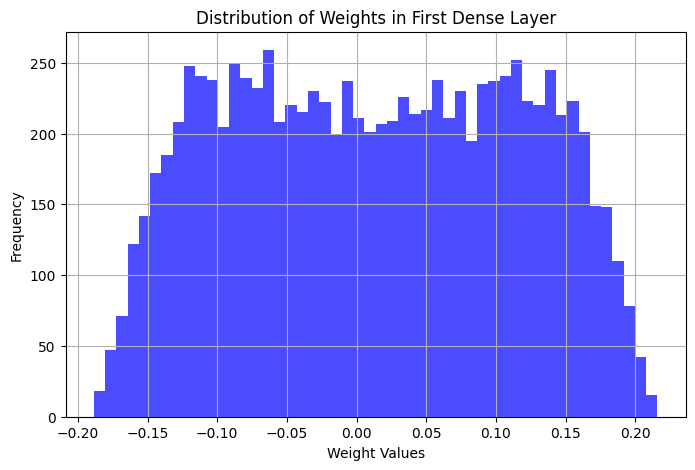

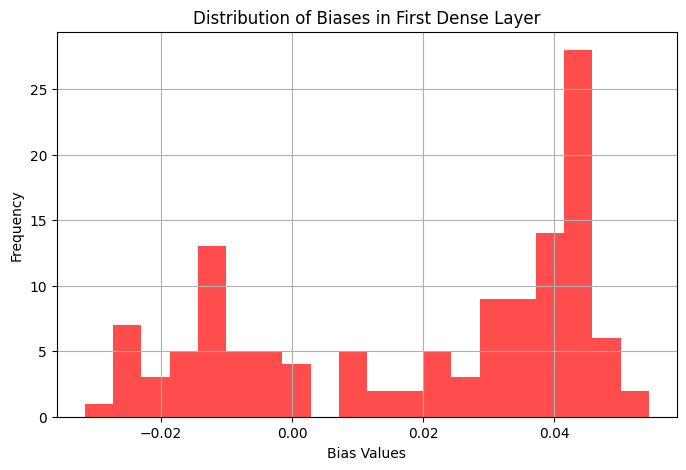

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Get weights & biases from the first dense layer
weights, biases = model.layers[0].get_weights()

# Plot histogram of weights
plt.figure(figsize=(8, 5))
plt.hist(weights.flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Weights in First Dense Layer")
plt.xlabel("Weight Values")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Plot histogram of biases
plt.figure(figsize=(8, 5))
plt.hist(biases, bins=20, color='red', alpha=0.7)
plt.title("Distribution of Biases in First Dense Layer")
plt.xlabel("Bias Values")
plt.ylabel("Frequency")
plt.grid()
plt.show()


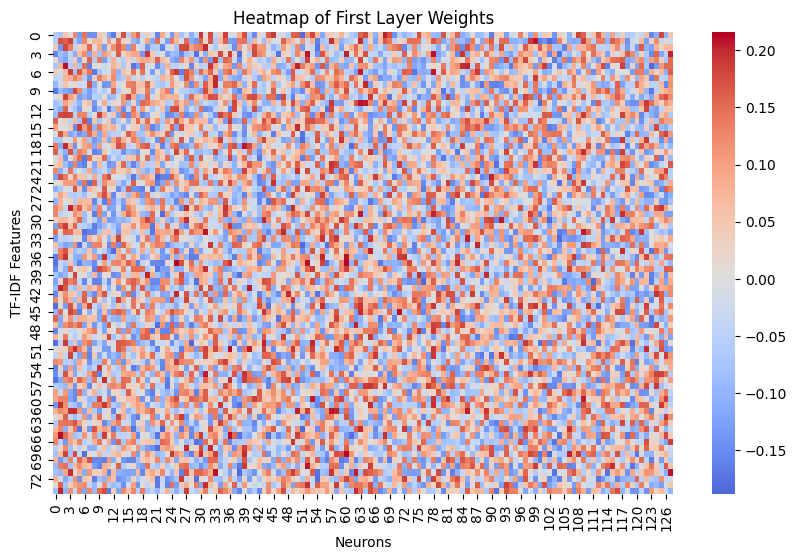

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Get the first layer weights
weights, biases = model.layers[0].get_weights()

# Reshape for visualization (if needed)
weights_matrix = np.reshape(weights, (weights.shape[0], -1))

# Plot heatmap of weight matrix
plt.figure(figsize=(10, 6))
sns.heatmap(weights_matrix, cmap="coolwarm", center=0)
plt.title("Heatmap of First Layer Weights")
plt.xlabel("Neurons")
plt.ylabel("TF-IDF Features")
plt.show()
